In [147]:
# FinalCode - Anthony Hugan - Sentiment analysis of Reddit News posts, against SPY ETF


import pandas as pd
pd.set_option('display.max_colwidth', None)
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style


import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')


import flair
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

import yfinance as yf

from pandas_datareader import data as pdr

import json

import requests

from pandas import json_normalize

2021-05-23 13:33:19,257 loading file C:\Users\Anthony\.flair\models\sentiment-en-mix-distillbert_4.pt


In [108]:
# checking to see if yahoo finance works 

msft = yf.Ticker("MSFT")

msft.info


{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 163000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for small and medium businesses, large organizations, and divisions of enterprises. Its Intelligent Cloud segment licenses SQL and Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and de

In [109]:
# Exporting data about spy from yahoo finance

spy_data = pdr.get_data_yahoo("SPY", start="2008-06-08", end="2016-07-01")

spy_data.to_csv('out.csv')

In [110]:
# Importing Reddit News

df = pd.read_csv('RedditNews.csv')

df.head()

,Date,News
0,2016-07-01,"A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later. Trinidad Alvarez Lira had waited years for proof that she had been born in 1898."
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so can Donald Trump"
3,2016-07-01,British Man Who Must Give Police 24 Hours' Notice of Sex Threatens Hunger Strike: The man is the subject of a sexual risk order despite having never been convicted of a crime.
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop opposing GMOs


In [112]:
# Testing Flair

sample = 'hello world!'
sample = flair.data.Sentence(sample)


In [113]:
sentiment_model.predict(sample)

sample

Sentence: "hello world !"   [− Tokens: 3  − Sentence-Labels: {'label': [POSITIVE (0.9968)]}]

In [114]:
sample.labels[0].value

'POSITIVE'

In [115]:
sample.labels[0].score

0.9968497157096863

In [116]:
# Loop to go through the data

sentiment = []
confidence = []

for sentence in df['News']:
    sample = flair.data.Sentence(sentence)
    sentiment_model.predict(sample)
    
    sentiment.append(sample.labels[0].value)
    confidence.append(sample.labels[0].score)

In [117]:
df['sentiment'] = sentiment
df['confidence'] = confidence

In [118]:
df.head()

df.dtypes

Date           object
News           object
sentiment      object
confidence    float64
dtype: object

In [152]:
# Importing Final Combined Data with Sentiment

Final_Data3 = pd.read_csv('FinalData2.csv')

Final_Data3.head()

,Date,News,sentiment,confidence,Close Price,Ticker
0,7/1/2016,"A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later. Trinidad Alvarez Lira had waited years for proof that she had been born in 1898.",NEGATIVE,0.986629,209.92,SPY
1,7/1/2016,IMF chief backs Athens as permanent Olympic host,POSITIVE,0.619313,209.92,SPY
2,7/1/2016,"The president of France says if Brexit won, so can Donald Trump",NEGATIVE,0.802927,209.92,SPY
3,7/1/2016,British Man Who Must Give Police 24 Hours' Notice of Sex Threatens Hunger Strike: The man is the subject of a sexual risk order despite having never been convicted of a crime.,NEGATIVE,0.993049,209.92,SPY
4,7/1/2016,100+ Nobel laureates urge Greenpeace to stop opposing GMOs,POSITIVE,0.594845,209.92,SPY


In [154]:
# Checking Data Types

Final_Data3.dtypes

Date            object
News            object
sentiment       object
confidence     float64
Close Price    float64
Ticker          object
dtype: object

In [156]:
# Giving numerical values to positive and negative sentiment. 

Final_Data3.sentiment[Final_Data3.sentiment == 'POSITIVE'] = 1
Final_Data3.sentiment[Final_Data3.sentiment == 'NEGATIVE'] = 0

Final_Data3.head()

<ipython-input-156-67e195e5b6e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_Data3.sentiment[Final_Data3.sentiment == 'POSITIVE'] = 1
<ipython-input-156-67e195e5b6e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_Data3.sentiment[Final_Data3.sentiment == 'NEGATIVE'] = 0


,Date,News,sentiment,confidence,Close Price,Ticker
0,7/1/2016,"A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later. Trinidad Alvarez Lira had waited years for proof that she had been born in 1898.",0,0.986629,209.92,SPY
1,7/1/2016,IMF chief backs Athens as permanent Olympic host,1,0.619313,209.92,SPY
2,7/1/2016,"The president of France says if Brexit won, so can Donald Trump",0,0.802927,209.92,SPY
3,7/1/2016,British Man Who Must Give Police 24 Hours' Notice of Sex Threatens Hunger Strike: The man is the subject of a sexual risk order despite having never been convicted of a crime.,0,0.993049,209.92,SPY
4,7/1/2016,100+ Nobel laureates urge Greenpeace to stop opposing GMOs,1,0.594845,209.92,SPY


<AxesSubplot:xlabel='Close Price', ylabel='sentiment'>

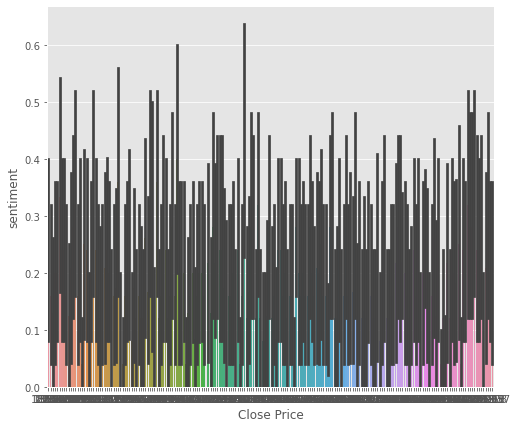

In [157]:
#Plotting Sentiment VS Price

import seaborn as sns

sns.barplot(x='Close Price', y='sentiment' , data=Final_Data3)